## Importing the Packages

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from termcolor import colored as cl 
import itertools 

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score

## Importing Data

In [16]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.drop('Time', axis = 1, inplace = True)

print(credit_card_data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

## Preprocessing Data

#### Checking Missing Values

In [17]:
credit_card_data.isnull().values.any()

False

## Statistical Analysis of Data

In [18]:
fraud_detection_cases = len(credit_card_data)
num_nonfraud = len(credit_card_data[credit_card_data.Class == 0])
num_fraud = len(credit_card_data[credit_card_data.Class == 1])
percentage_fraud = round(num_fraud/num_nonfraud*100, 2)

print(cl('Number of fraud detection cases:'))
print(cl('There are in total {} cases of fraud detection.'.format(fraud_detection_cases)))
print(cl('Number of Non-fraud cases are {}'.format(num_nonfraud)))
print(cl('Number of Non-fraud cases are {}'.format(num_fraud)))
print(cl('Percentage of fraud cases is {}'.format(percentage_fraud)))

Number of fraud detection cases:
There are in total 284807 cases of fraud detection.
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17


In [19]:
nonfraud_cases = credit_card_data[credit_card_data.Class == 0]
fraud_cases = credit_card_data[credit_card_data.Class == 1]

print(cl('CASE AMOUNT STATISTICS'))
print(cl('--------------------------------------------'))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------'))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())


CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## Normalization of Values 

In [20]:
sc = StandardScaler()
amount = credit_card_data['Amount'].values

credit_card_data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(credit_card_data['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


## Data Split

In [21]:
X = credit_card_data.drop('Class', axis = 1).values
y = credit_card_data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : '), X_train[:1])
print(cl('X_test samples : '), X_test[0:1])
print(cl('y_train samples : '), y_train[0:20])
print(cl('y_test samples : '), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Evaluation

In [22]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Traing,Testing and Evaluation of Models

F1 score of the Decision Tree model is 0.8105263157894738


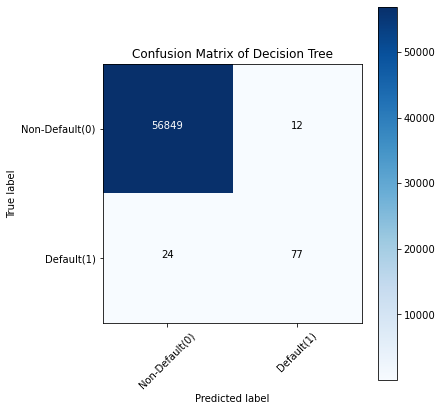

In [23]:
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)


print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))


tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
plt.rcParams['figure.figsize'] = (6, 6)
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

F1 score of the KNN model is 0.8571428571428572


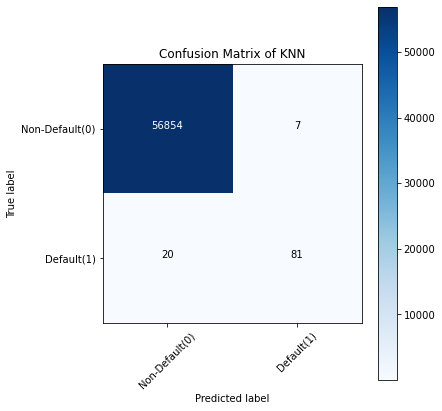

In [24]:
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
plt.rcParams['figure.figsize'] = (6, 6)
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()
